# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



Following the **CRISP-DM** framework for working through this data problem.

## Business Understanding

#### Business Objectives
The goal of this project is to build Machine Learning Classification models that can predict if the client will subscribe a term deposit and compare the performance of different classifiers used.


#### Business Success Criteria
The success criteria is each model's accuracy, measured by lower values of evaluation metrics and thus achieve:
* Increase the number of customers who subscribe to a term deposit.
* Identify the most effective marketing strategies to achieve the goal of subscription.

## Data Understanding

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls.
The dataset collected is related to 17 campaigns that occurred between May 2008 and November 2010, corresponding to a total of 79354 contacts. <br>

The dataset contains 41188 rows and 21 columns.

### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?



In [538]:
#The dataset collected is related to 17 campaigns that occurred between May 2008 and November 2010, corresponding to a total of 79354 contacts.

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [540]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

import time

In [541]:
import warnings
warnings.filterwarnings('ignore')

In [542]:
data = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [543]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

**Business Objective of the Task:**<br>
The objective of the task is to predict whether a client will subscribe to a term deposit, based on their personal, social, and economic attributes.

In [547]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### **Exploratory Data Analysis (EDA)**

Here we explore the data to identify data quality issues and gain initial insights. Performing Exploratory Data Analysis (EDA), using summary statistics and data visualizations to uncover patterns and relationships.

#### Cleaning the Data

Investigating the dataset for missing or problematic data.

In [552]:
data.shape

(41188, 21)

The provided dataset contains 41188 entries and 21 features.

Checking for Duplicate entries.

In [555]:
duplicate_count = data.duplicated().sum()
print("Number of duplicate rows: ", duplicate_count)

Number of duplicate rows:  12


Dropping the duplicate entries.

In [557]:
data = data.drop_duplicates()

In [558]:
data.shape

(41176, 21)

Below is the concise summary of the dataframe

In [560]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null  floa

In [561]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


Checking for missing values

In [563]:
#returns the total number of missing values per column
data.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

There are no null or NaN or missing values in the data.

#### Analysing the data

##### **Univariate Analysis**

Below Histograms show the distribution of individual numerical features.

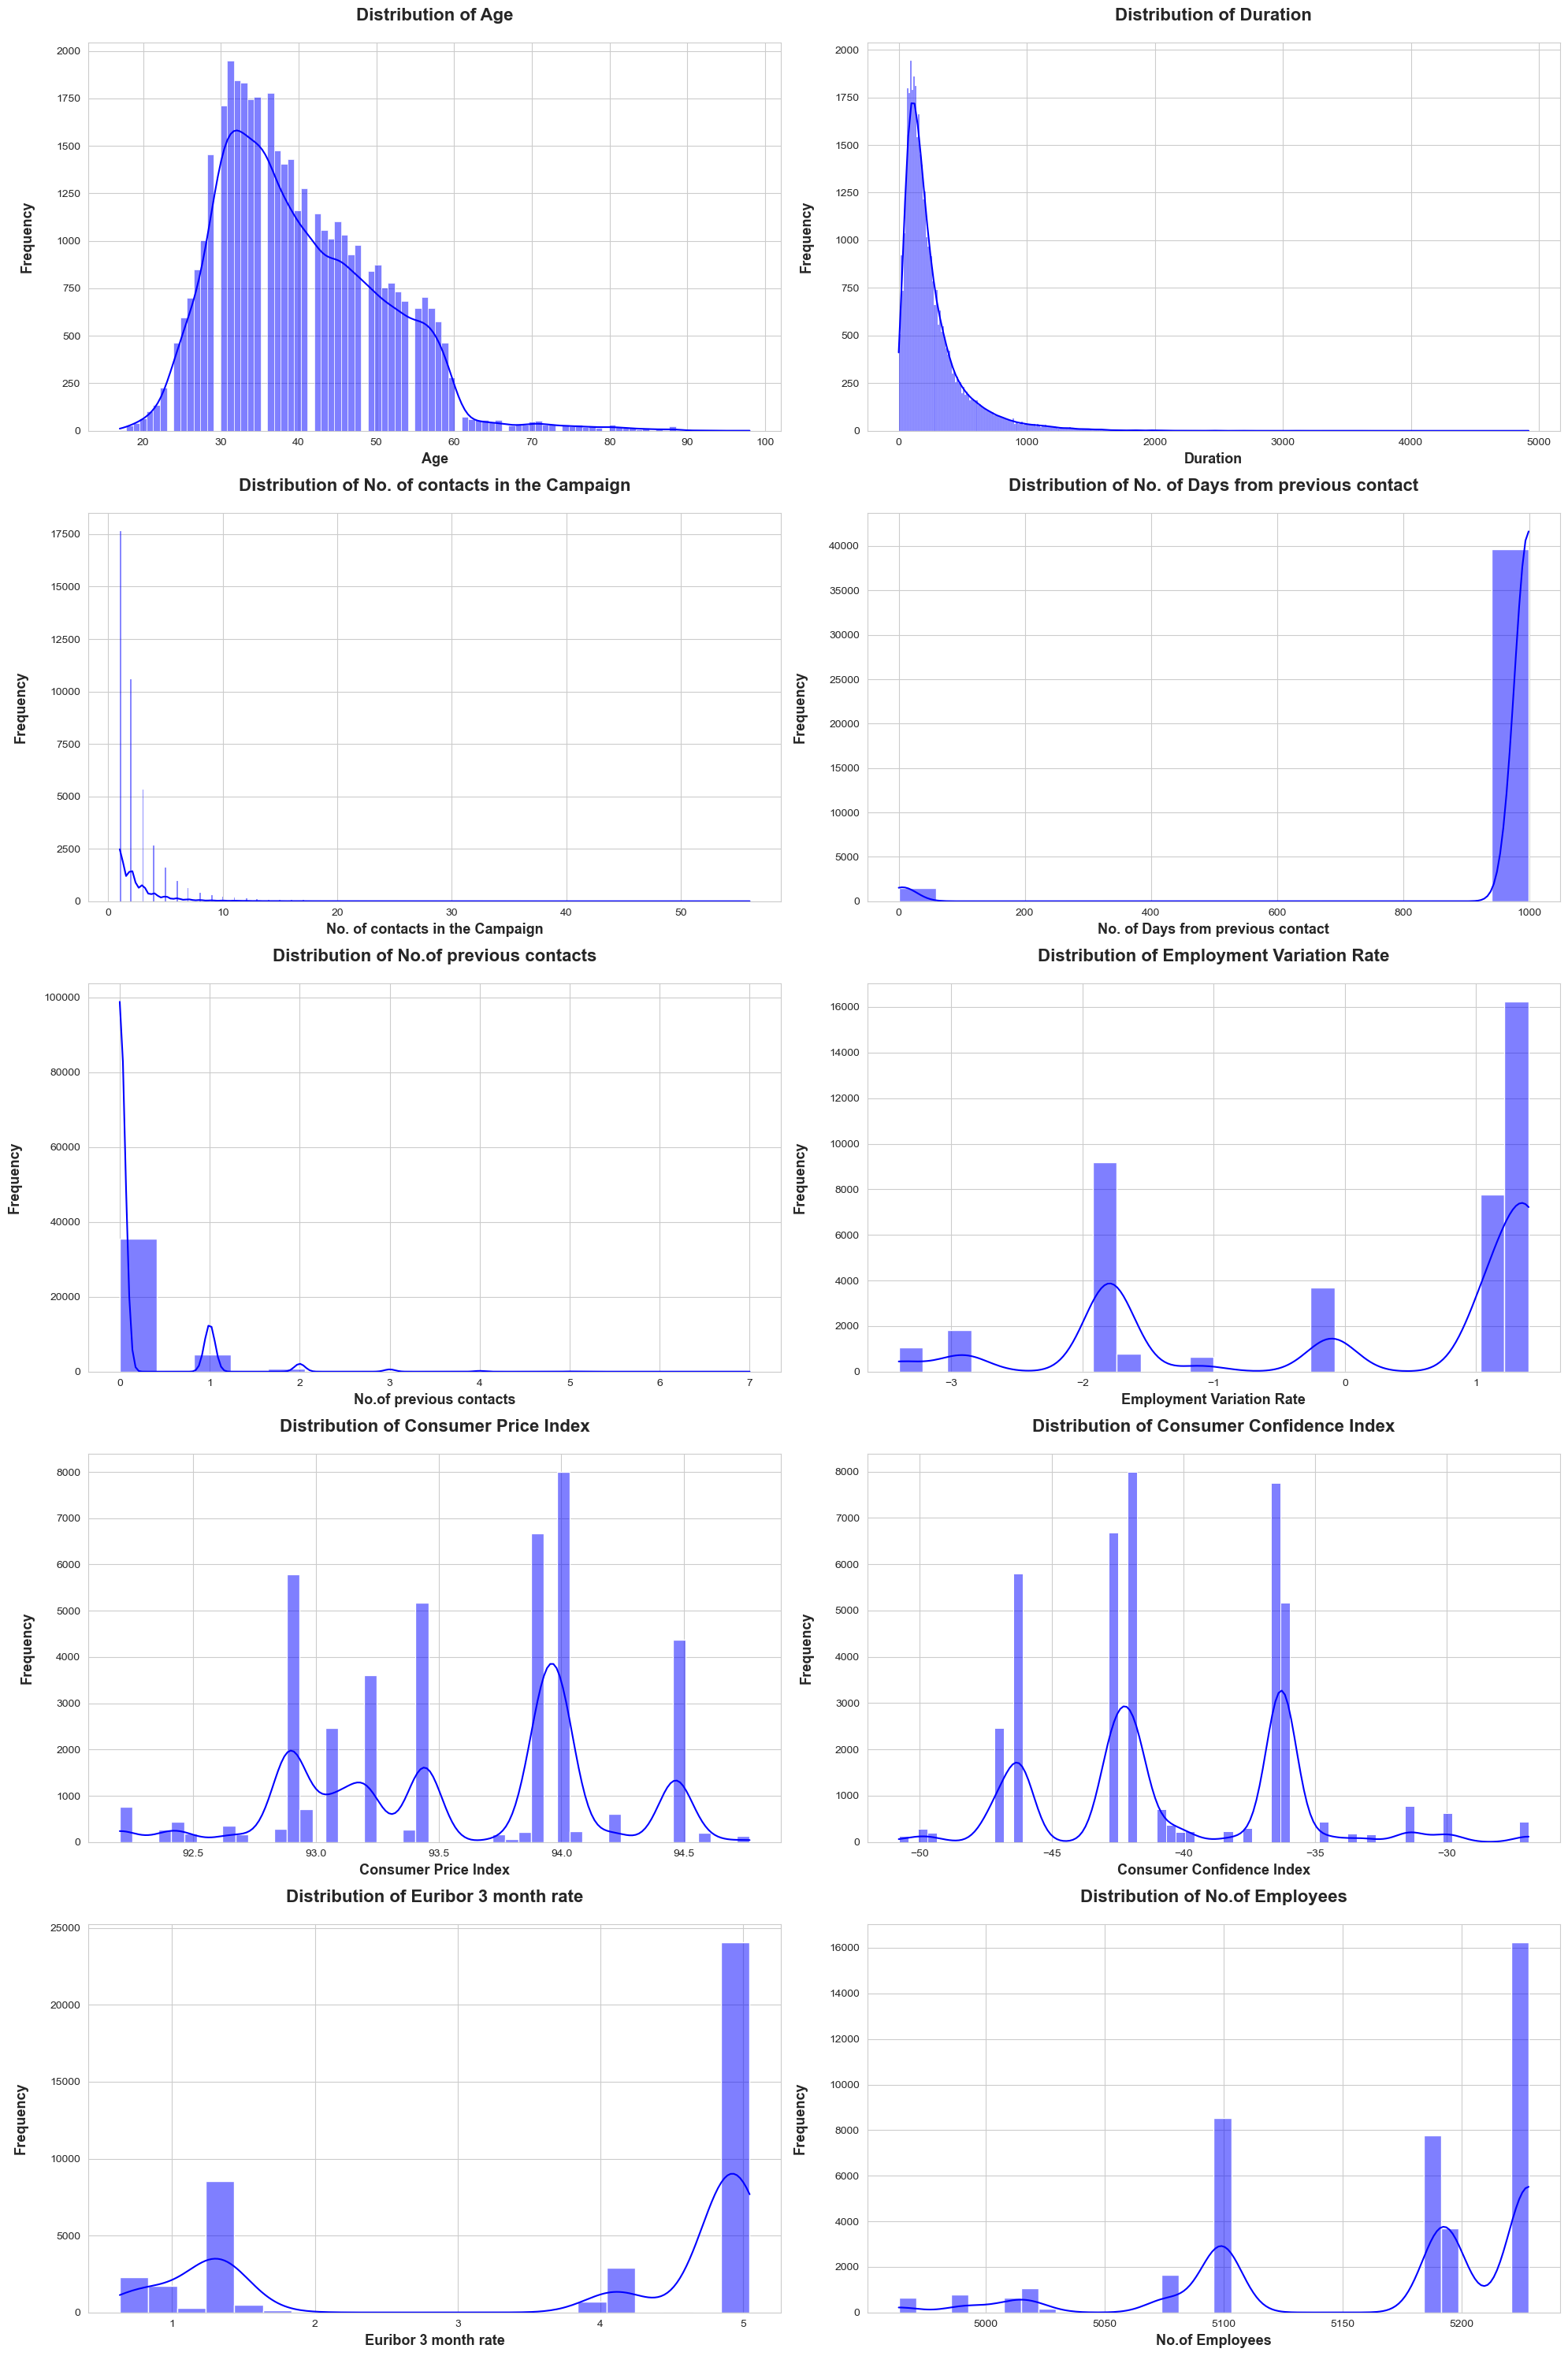

In [568]:
sns.set_style('whitegrid')

# Identify numerical columns
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns

#Define a dictionary for readable column names
col_names = {'age': 'Age', 'duration': 'Duration', 'campaign': 'No. of contacts in the Campaign', 'pdays': 'No. of Days from previous contact', 
             'previous': 'No.of previous contacts','emp.var.rate': 'Employment Variation Rate', 'cons.price.idx': 'Consumer Price Index',
             'cons.conf.idx': 'Consumer Confidence Index', 'euribor3m': 'Euribor 3 month rate', 'nr.employed': 'No.of Employees'
            }

# Calculate the number of subplots
num_plots = len(numerical_cols)
cols = 2
rows = (num_plots // cols) + (1 if num_plots % cols > 0 else 0)
fig, axes = plt.subplots(rows, cols, figsize=(20, 6 * rows))
axes = axes.flatten()

# Plot histograms for each numerical feature
for i, col in enumerate(numerical_cols):
    sns.histplot(data[col], kde=True, ax=axes[i], color='blue')
    axes[i].set_title(f'Distribution of {col_names[col]}', pad=20, fontsize=16, fontweight='bold')
    axes[i].set_xlabel(col_names[col],fontsize=13, fontweight='bold')
    axes[i].set_ylabel('Frequency',labelpad=20, fontsize=13, fontweight='bold')

# Hide any unused subplots
for i in range(num_plots, len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

**Findings:**
1. **Age**: Majority of the customers targeted in the marketing campaign are in the middle-aged range (30s-50s).

2. **Duration**: The duration of the last contact has a large concentration of very short calls and a fewer very long calls.

3. **Campaign**: The number of contacts during this campaign for a client shows that most clients were contacted only a few times (1-2 times), with a long tail of outliers who were contacted many times.

4. **Pdays**: This variable indicates the number of days since the client was last contacted from a previous campaign. The histogram for 
pdays shows a very large bar at the value of 999. This value signifies that the client was not previously contacted, indicating that a significant portion of the dataset consists of new or previously untouched contacts.

5. **Previous**: The previous variable, which counts the number of contacts before this campaign, would show a distribution where a very large number of clients have zero previous contacts. This reinforces the finding from the pdays variable that many of the contacts were part of the first-time campaign.

   **Distribution of economic indices**:<br>
1. **emp.var.rate (Employment Variation Rate)**: Employment Variation Rate changed in large discrete steps rather than a smooth, continuous variation over the period. This shows major economic trends.

2.  **cons.price.idx (Consumer Price Index)**: Consumer Price Index distribution shows clusters of values rather than a normal distribution which suggests that consumer prices were relatively stable or changed in specific periods.

3.  **cons.conf.idx (Consumer Confidence Index)**: Consumer Confidence Index shows a distribution of cunsumer sentiments during the time of marketing calls,  with clear highs and lows at specific values.

4. **euribor3m (Euribor 3 month rate)**: Euribor 3 month rate shows that interest rates changed only a few times throughout the campaign period.

5. **nr.employed (No.of Employees)** : No.of Employees is an economic indicator, it reflects the current state of the labor market and  economic health. The histogram shows a discrete distribution with distinct peaks at a few specific values which indicates that the number of employees was reported at a few fixed points in time, rather than changing continuously.

Below Countplots show the distribution of individual categorical features.

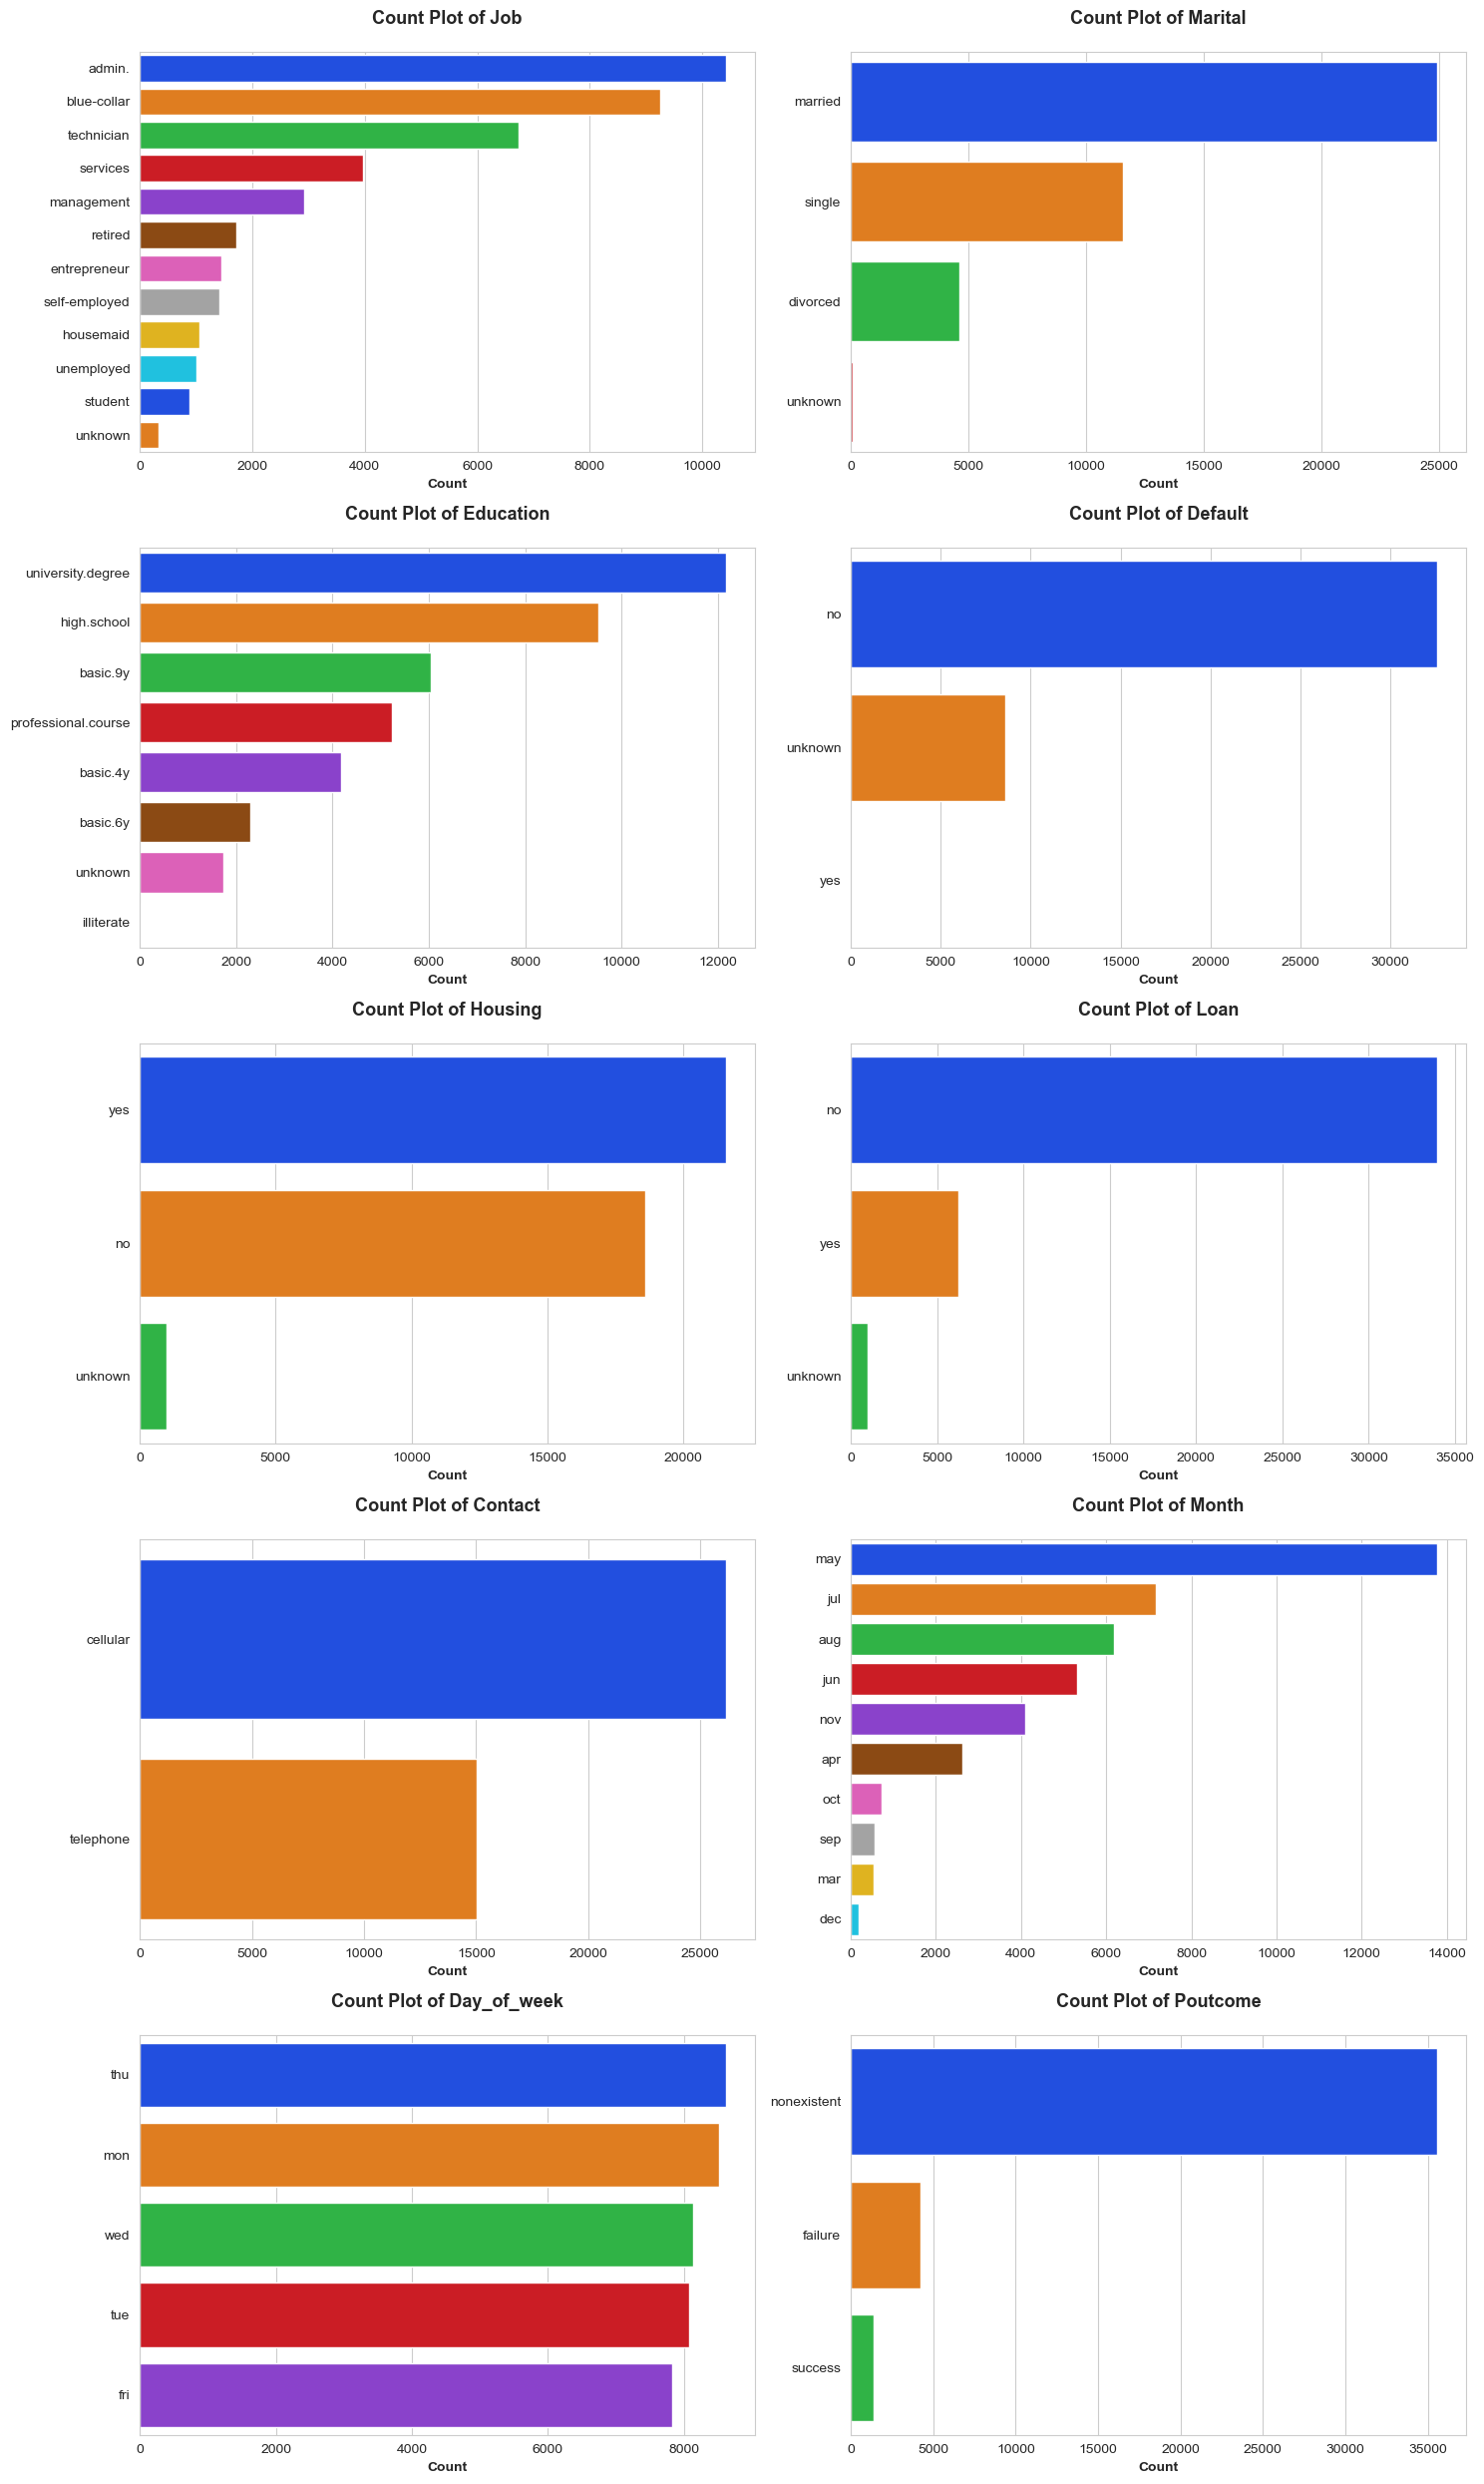

In [571]:
sns.set_style('whitegrid')
# Identify categorical columns
categorical_cols = data.drop('y', axis=1).select_dtypes(include=['object']).columns

# Calculate the number of subplots
num_plots = len(categorical_cols)
cols = 2
rows = (num_plots // cols) + (1 if num_plots % cols > 0 else 0)

# Create a figure and subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
axes = axes.flatten()

# Plot count plots for each categorical feature
for i, col in enumerate(categorical_cols):
    sns.countplot(y=data[col], ax=axes[i], order=data[col].value_counts().index, palette='bright', saturation=0.75)
    axes[i].set_title(f'Count Plot of {col.capitalize()}', pad=20, fontsize=13, fontweight='bold')
    axes[i].set_xlabel('Count',fontsize=10, fontweight='bold')
    axes[i].set_ylabel('')

# Hide any unused subplots
for i in range(num_plots, len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

**Findings:**
1. **Job**:The most common job is 'admin.', followed by 'blue-collar' and 'technician'. The least represented jobs are 'housemaid', 'unemployed', 'students' and 'unknown'. This indicates that the bank's marketing campaign primarily targets a few specific professions.
2. **Marital Status**: The marital status plot shows that the majority of clients are 'married', followed by 'single', and then 'divorced'. The number of clients with 'unknown' marital status is very small. This suggests the campaign was mainly focused on a married demographic.
3. **Education**: The education plot shows a significant number of clients with a 'university.degree' or 'high.school' education, followed by those with 'basic.9y' or 'professional.course'.
4. **Default (Financial Status)**: The count plot shows a very high number of 'no' responses which indicates that a vast majority of customers have no credit in default.
5. **Housing**: Most customers have a housing loan.
6. **Loan**: Most customers don't have a personal loan.
7. **Contact**: Shows a significant preference for contacting clients via 'cellular' phone over 'telephone'.
8. **Month** : Plot of the last contact month shows a very high concentration of calls in the months of May, July, and August, and very few in December or March. This suggests a seasonal or targeted campaign schedule.
9. **Day of Week**: The calls are relatively evenly distributed across the days of the week, from Monday to Friday
10. **Poutcome**: This plot provides insights into the success of the previous campaign. It shows a high number of 'nonexistent' outcomes, which means that for the vast majority of clients, there was no previous campaign interaction. The number of successful and failed outcomes is very small in comparison.

Below countplot shows the distribution of the target variable `y` whether the client subscribed to a term deposit or not.

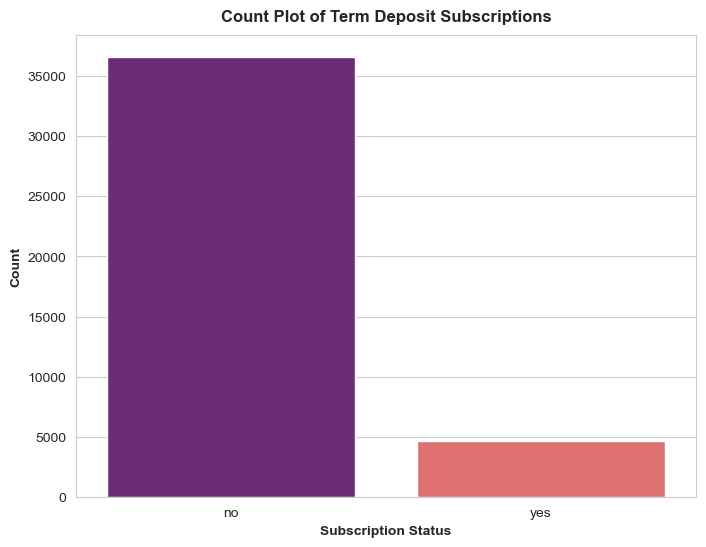

In [574]:
sns.set_style('whitegrid')
# Create the count plot for the target variable 'y'
plt.figure(figsize=(8, 6))
sns.countplot(x=data['y'], order=data['y'].value_counts().index, palette='magma', saturation=0.75)
plt.title('Count Plot of Term Deposit Subscriptions', pad=10, fontsize=12, fontweight='bold')
plt.ylabel('Count',fontsize=10, fontweight='bold')
plt.xlabel('Subscription Status', fontsize=10, fontweight='bold')
plt.show()

**Findings from the target variable plot**:
1. The count plot for the target variable y (whether the client subscribed to a term deposit) reveals a severe class imbalance. The number of clients who did not subscribe is drastically higher than those who said 'yes'.
2. The high imbalance in the class is a challenge for a predictive model, as it will be much easier to predict the "no" class, and a model's performance should be carefully evaluated using metrics other than just accuracy.

##### **Handling Outliers**

The features `age`, `duration`, `campaign` and `pdays` show significant outliers.

**age**: As this is a bank marketing dataset, the age distribution is likely to have a natural right skew, with a long tail of older individuals. So it doesn't need any outlier treatment.<br>
**duration**: The duration of the last contact is highly skewed, with many short contacts and a long tail of very long calls. `duration` is known only after a successful call, so this highly influences the outcome. Dropping this entire column would be an effective approach than handling its outliers.<br>
**campaign**: This feature has a long tail of clients who were contacted many times. While most clients are contacted only once or twice, some have an extremely high number of contacts (eg.40 or more). **These are outliers that could be removed**.<br>
**pdays**: The pdays column has a large number of 999 values, which indicate that the client was not previously contacted. This is a special value and should not be treated as a numerical outlier.


Removing outliers of `campaign` feature.

In [580]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = data['campaign'].quantile(0.25)
Q3 = data['campaign'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
data = data[(data['campaign'] >= lower_bound) & (data['campaign'] <= upper_bound)]

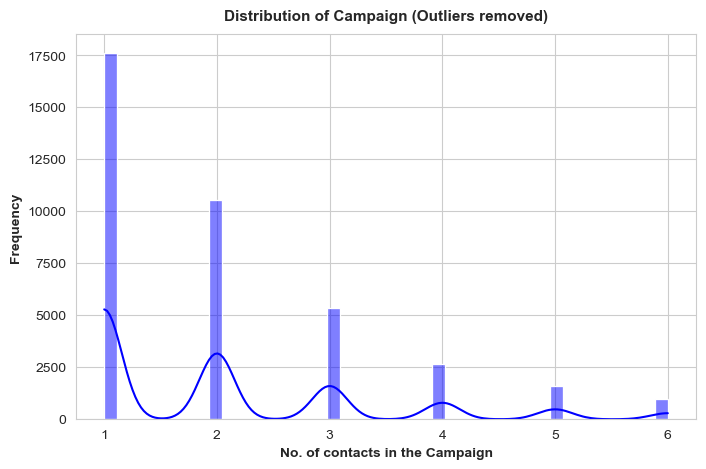

In [581]:
sns.set_style('whitegrid')
plt.figure(figsize=(8, 5))
sns.histplot(data['campaign'], kde=True, color='blue')
plt.title('Distribution of Campaign (Outliers removed)', pad=10, fontsize=11, fontweight='bold')
plt.ylabel('Frequency',fontsize=10, fontweight='bold')
plt.xlabel('No. of contacts in the Campaign', fontsize=10, fontweight='bold')
plt.show()

Shown below is the descriptive statistics of the data after cleaning up.

In [583]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,38770.000000,38770.000000,38770.000000,38770.000000,38770.000000,38770.000000,38770.000000,38770.000000,38770.000000,38770.000000
mean,40.015966,262.520660,2.044338,960.632706,0.180578,0.036183,93.562424,-40.499234,3.575555,5164.995527
std,10.447652,259.431637,1.280339,191.383976,0.504890,1.581228,0.580864,4.680236,1.746757,72.872694
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,106.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,184.000000,2.000000,999.000000,0.000000,1.100000,93.444000,-41.800000,4.857000,5191.000000
75%,47.000000,323.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4918.000000,6.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


**Actionable Insights from Univariate Analysis:**<br>

**1.Identify the Audience of campaign**:
   * **Age**: The campaign's primary focus was on middle-aged clients (30-50). The bank could develop tailored strategies for younger or older demographics, who might have different financial needs.
   * **Job & Education**: The campaign was focused on 'admin.', 'blue-collar', 'technician', and university-degree clients. The bank should consider creating campaigns to reach other segments, like students or retirees, who may have specific savings or investment needs.
   * **Marital Status**: With a majority of clients being married, the bank could design products or services that appeal to families.

**2. Communication Strategy**:

   * **Contact**: The high number of calls made via 'cellular' phones. The bank should continue to prioritize this channel and potentially explore other digital ways like SMS marketing or banking app notifications.

   * **Campaign Frequency**: Most clients were contacted only once or twice. This suggests that the bank may be missing opportunities for follow-up. The bank could look into a strategy for making follow-ups.

   * **Timing of Campaign**: The concentration of calls in May, July, and November suggests a seasonal marketing push. The bank could analyze the effectiveness of these peak months to determine if the timing is linked to a higher success rate. <br>
   The relatively uniform distribution of calls across weekdays suggests a consistent effort, which is a good practice.

**3. Understand the Customer's Financial Status**:
   * **Loan Status**: A large proportion of clients have a housing loan but not a personal loan. This information can be used to categorize  customers and offer them relevant products.

   * **Previous Outcome**: The high number of 'nonexistent' values in the poutcome column indicates that a large portion of the campaign was directed at new clients or those who were not previously contacted. This suggests an opportunity to create a targeted strategy for clients who were previously contacted but did not subscribe.

##### **Bivariate Analysis:**

Here we will explore relationships between the target variable and other independant variables to identify the possible predictors of the outcome.

Exploring the **relationship of categorical features with the target variable**.

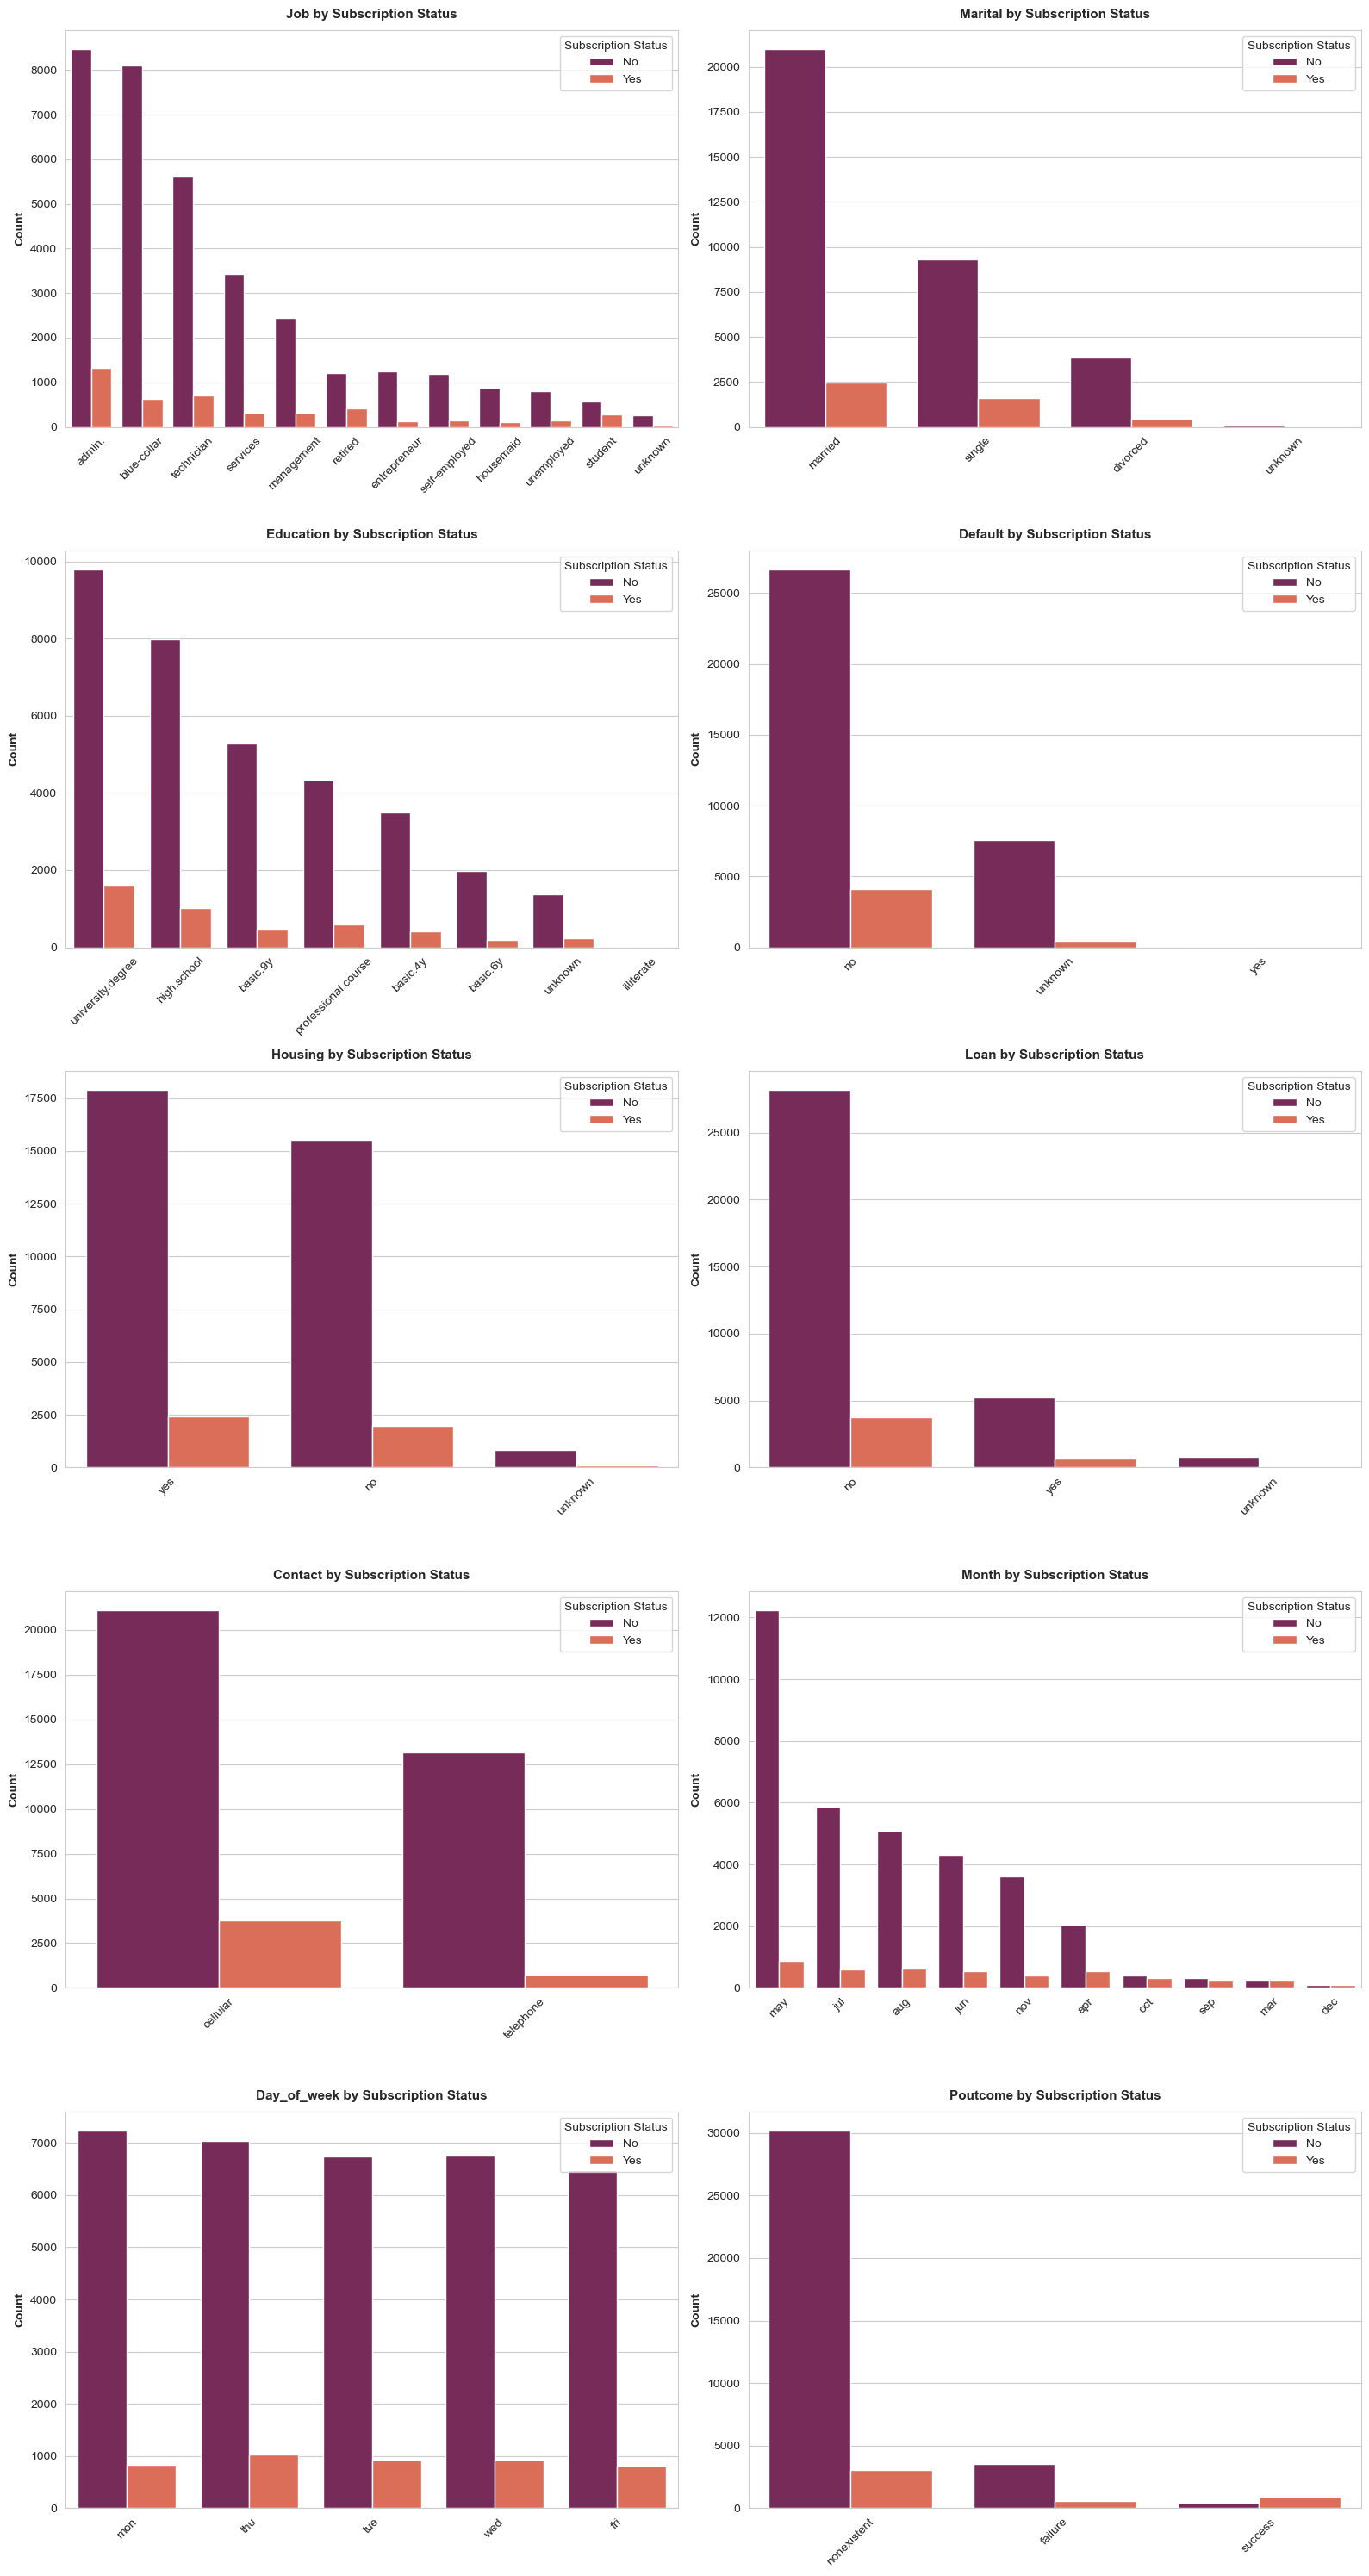

In [588]:
# Set a style for the plots
sns.set_style('whitegrid')
# Identify categorical columns, excluding the target variable 'y'
categorical_cols = data.select_dtypes(include=['object']).columns.drop('y')

# Calculate the number of subplots
num_plots = len(categorical_cols)
cols = 2
rows = (num_plots // cols) + (1 if num_plots % cols > 0 else 0)

# Create a figure and subplots
fig, axes = plt.subplots(rows, cols, figsize=(16, 6 * rows))
axes = axes.flatten()

# Plot count plots for each categorical feature against 'y'
for i, col in enumerate(categorical_cols):
    sns.countplot(x=data[col], hue=data['y'], ax=axes[i], palette = 'rocket', order=data[col].value_counts().index)
    axes[i].set_title(f'{col.capitalize()} by Subscription Status',pad=10, fontsize=11, fontweight='bold')
    axes[i].set_ylabel('Count',fontsize=10, fontweight='bold')
    axes[i].set_xlabel('')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].legend(title='Subscription Status', labels=['No', 'Yes'])

# Hide any unused subplots
for i in range(num_plots, len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

Exploring more on the trend of timing of the campaign. Below is a line plot showing the month of th year and day of the week the compaign was conducted.

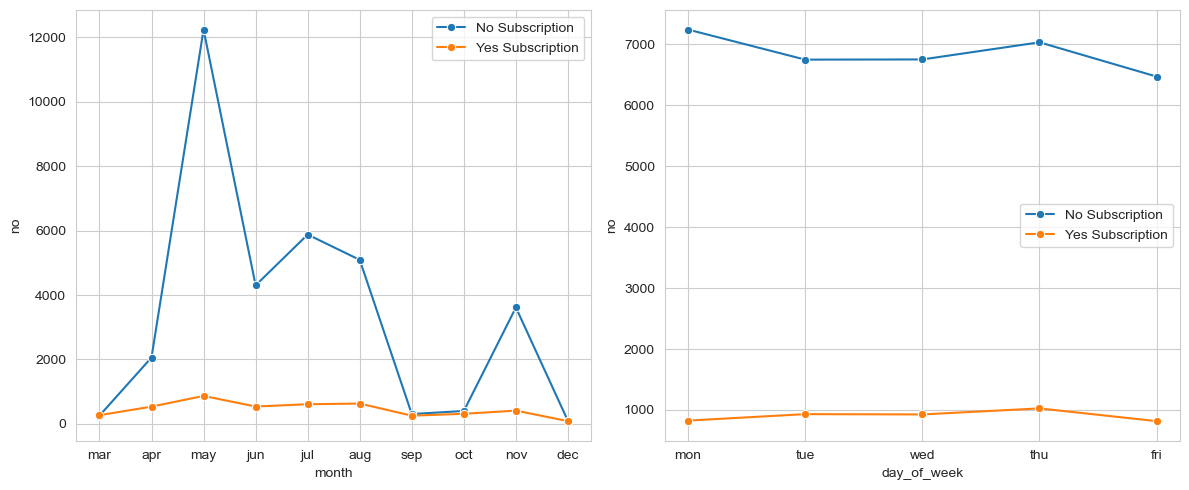

In [590]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.set_style("whitegrid")
# Define the correct chronological order of months
month_order = ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

# Count the number of 'yes' and 'no' responses for each month
monthly_counts = data.groupby(['month', 'y']).size().unstack().loc[month_order]

# Define the correct chronological order of days of the week
week_order = ['mon', 'tue', 'wed', 'thu', 'fri']

# Count the number of 'yes' and 'no' responses for each day
weekly_counts = data.groupby(['day_of_week', 'y']).size().unstack().loc[week_order]

#Plotting month
# Plot the 'no' subscriptions
sns.lineplot(x=monthly_counts.index, y=monthly_counts['no'], marker='o', ax=axes[0],label='No Subscription')

# Plot the 'yes' subscriptions
sns.lineplot(x=monthly_counts.index, y=monthly_counts['yes'], marker='o', ax=axes[0],label='Yes Subscription')

#Plotting day_of_week
# Plot the 'no' subscriptions
sns.lineplot(x=weekly_counts.index, y=weekly_counts['no'], marker='o', ax=axes[1],label='No Subscription')

# Plot the 'yes' subscriptions
sns.lineplot(x=weekly_counts.index, y=weekly_counts['yes'], marker='o', ax=axes[1],label='Yes Subscription')

plt.tight_layout()
plt.show()

**Findings**
1. **Strongest Predictors**:
    * **`poutcome` (Outcome of previous campaign)**: The analysis shows that clients who had a successful outcome in a previous campaign are  significantly more likely to subscribe the current one. This suggests that past positive response is a strong indicator of future success.
    * **`contact`**: The plots show that the majority of successful subscriptions came from calls made via cellular phones.
2. **Demographics**:
   * **Job & Education**: While the bank targeted a wide range of jobs, specific groups like 'students' and the 'retired' have a disproportionately higher subscription rate. While university.degree is common, the subscription rate for basic education levels are a little higher.
   * **Marital Status**: Married clients represent the largest group, but the subscription rate for single and divorced clients is higher when considering the total number of people in each group. This suggests that individuals without a spouse might be more attracted to the campaign.
3. **Financial Status**:
   * The analysis shows that clients with no credit in default, those without a personal loan and those with a housing loan, are the most frequent targets of the campaign.
4. **Campaign Timing**:
   * **Month**: The campaign was not evenly distributed throughout the year. Most calls were made in May, Jun, Jul and Aug perhaps due to Bank's strategy. But the subsciption rate is seen higher in the months Oct, Spet, Mar and Dec though the calls made were very less.
   * **Day of week**: The plot suggests a consistent campaign schedule without a significant preference for a specific day.

Exploring the **relationship of numerical features with the target variable**

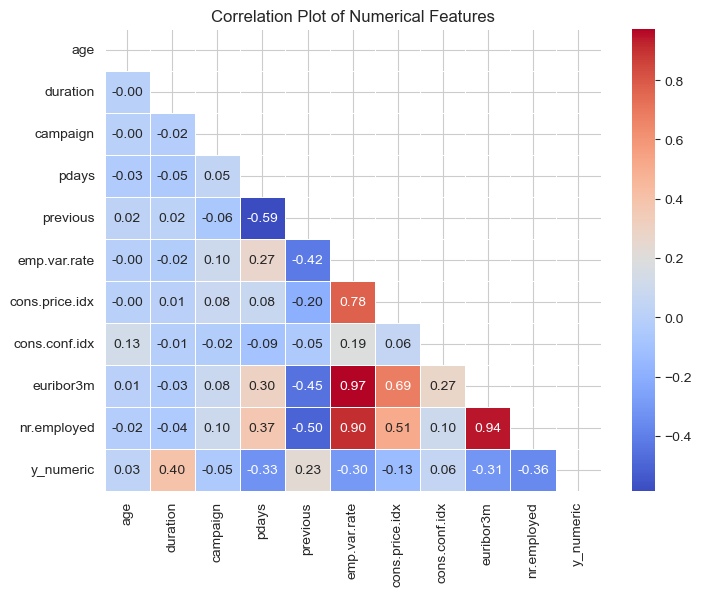

In [593]:
# Convert the target variable 'y' to a numerical format (0 and 1)
data_copy = data.copy(deep=True)
data_copy['y_numeric'] = data_copy['y'].map({'no': 0, 'yes': 1})

# Select only the numerical columns for correlation analysis
numerical_df = data_copy.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
# Create a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, mask=mask)
plt.title('Correlation Plot of Numerical Features')
plt.show()

Below Box plots visualizes the bivariate analysis of the numerical features with the target variavle`y`

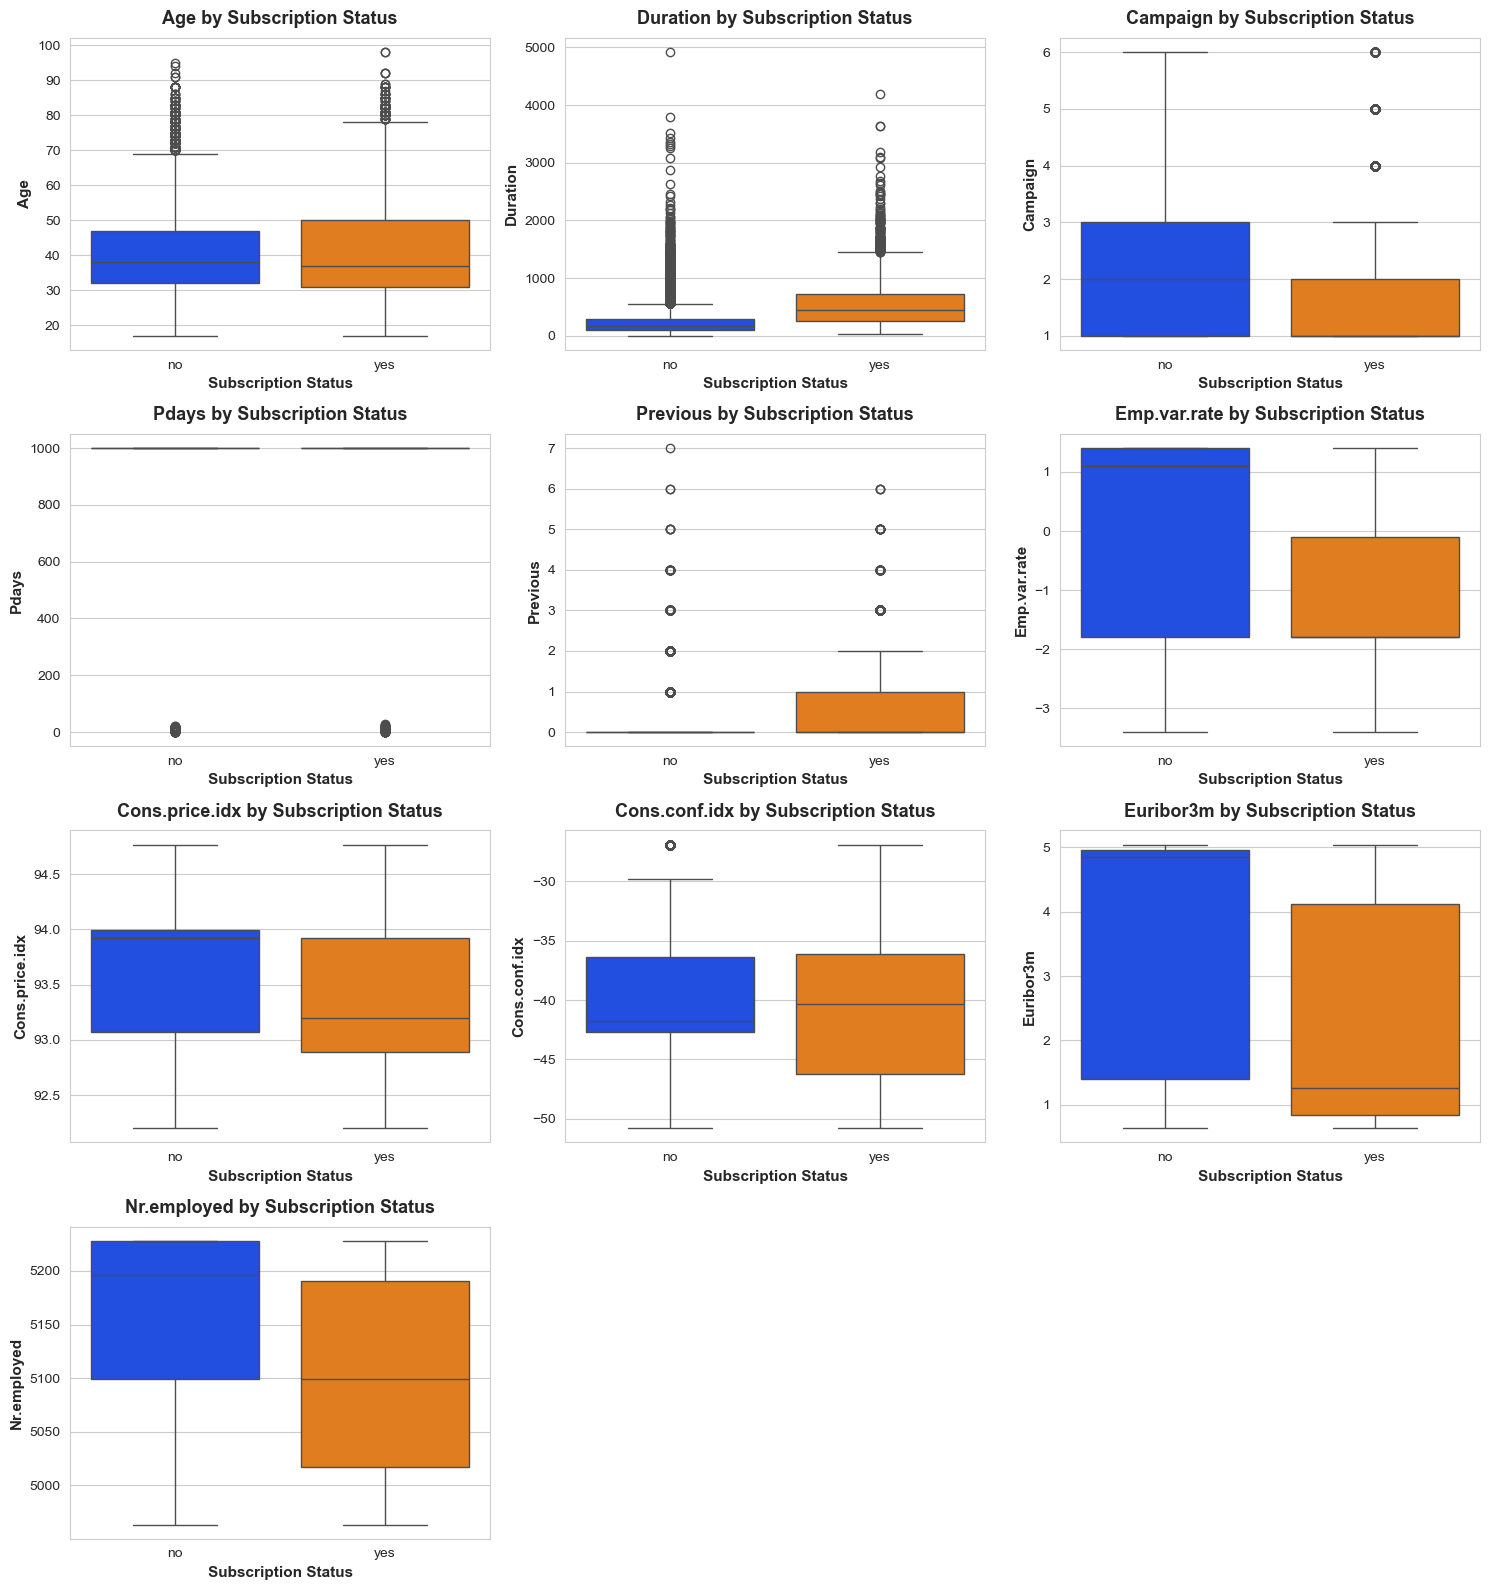

In [595]:
# Set a style for the plots
sns.set_style('whitegrid')

# Identify numerical columns
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns

# Determine grid size for subplots
num_plots = len(numerical_cols)
cols = 3
rows = (num_plots // cols) + (1 if num_plots % cols > 0 else 0)

fig, axes = plt.subplots(rows, cols, figsize=(15, 4 * rows))
axes = axes.flatten()

# Plot box plots for each numerical feature against 'y'
for i, col in enumerate(numerical_cols):
    sns.boxplot(x='y', y=col, data=data, ax=axes[i], palette='bright')
    axes[i].set_title(f'{col.capitalize()} by Subscription Status', pad=10, fontsize=13, fontweight='bold')
    axes[i].set_xlabel('Subscription Status', fontsize=11, fontweight='bold')
    axes[i].set_ylabel(col.capitalize(), fontsize=11, fontweight='bold')

# Hide any unused subplots
for i in range(num_plots, len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

**Findings**
1. **Strong Positive correlations**:
   * **`duration`**: This has the strongest positive correlation with the target variable `y`. This suggests that the longer the call, the more chances the client is to subscribe. Since the call duration is only known after the outcome, **this variable cannot be used to predict the outcome of a future call**.
   * **`previous`**: The number of contacts made previously to the same client has a positive correlation with target; which means the past campaign efforts make the clients more receptive to the subscription.
2. **Strong Negative correlations**:
   * **`euribor3m`**: There is a strong negative correlation between the interest rate and the subscription outcome. This indicates that clients were less likely to subscribe to a term deposit when the interest rate was high.
   * **`nr.employed`**: This feature also has a strong negative correlation with `y`. This suggests that the campaign was more successful when unemployment was higher.
4. **Weak Correlations**:
   * **`age`**: There is a weak positive correlation between `age` and target variable `y`. This suggests that older individuals, such as retirees, may be more open to this type of subscriptions.
   * **`campaign`**: There is a negative correlation between the number of contacts in the campaign to the target variable. The success rate  decreases as the number of contacts increases.
   * **`pdays`**: The heatmap shows a negative correlation betweeen number of days since previous contact and the taregt variable. But because the high value indicated first time contact, this is misleading.
   * **`emp.var.rate`**: Shows a negative correlation with y, indicating that during periods of a weak economy there were more successful  outcomes for the bank.
   * **`cons.price.idx`**: This also shows a negative correlation with y, indicating that during periods of a weak economy there were more successful  outcomes for the bank.

**Exploring the Behavioral features**, revealing client's interactions with the Bank.

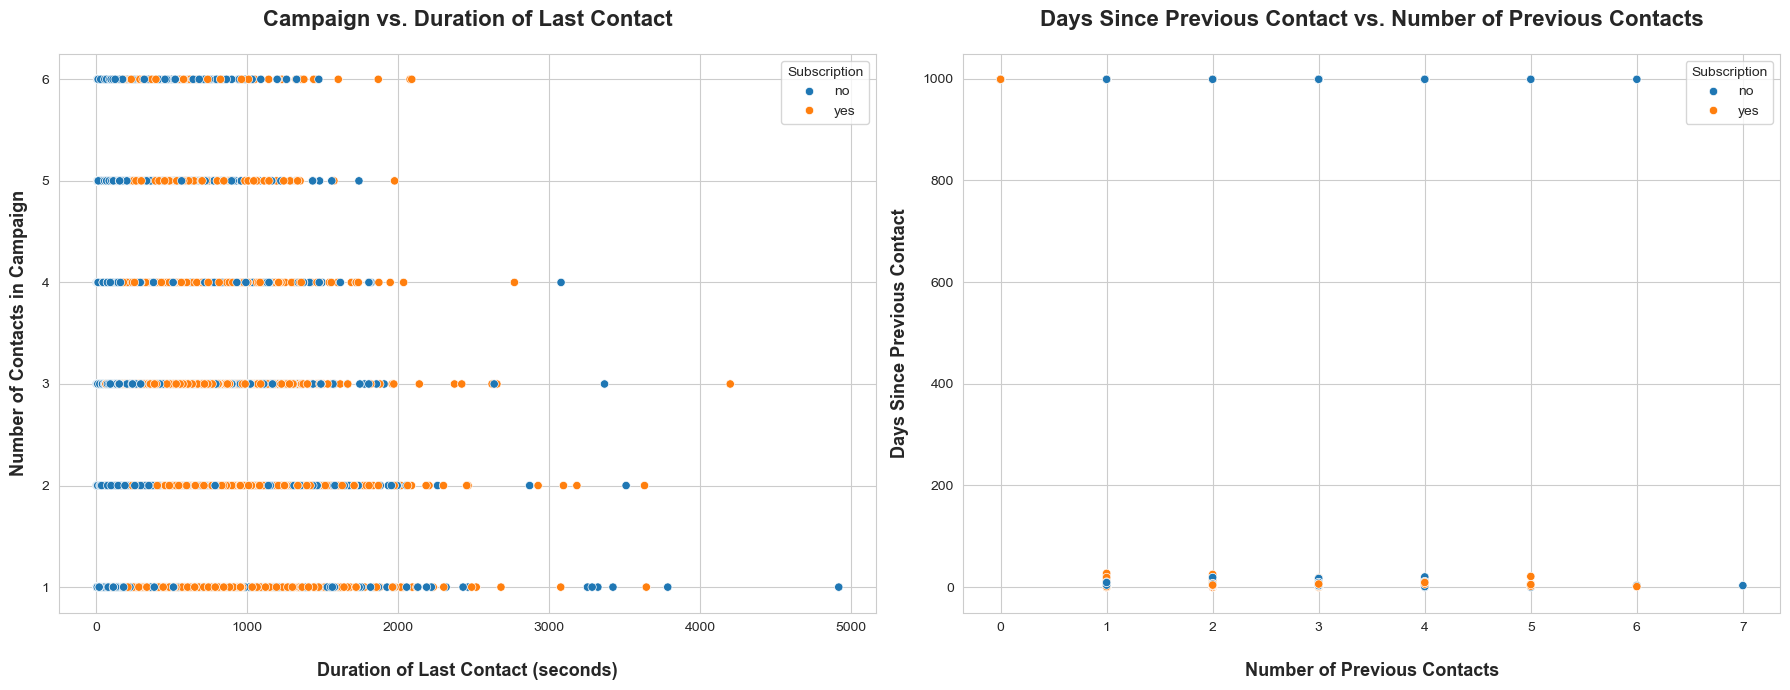

In [598]:
# Set a style for the plots
sns.set_style('whitegrid')

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Plot 1: campaign vs. duration, color-coded by y
sns.scatterplot(x='duration', y='campaign', hue='y', data=data, ax=axes[0])
axes[0].set_title('Campaign vs. Duration of Last Contact',pad=20, fontweight='bold', fontsize=16)
axes[0].set_xlabel('Duration of Last Contact (seconds)',labelpad=20, fontsize=13, fontweight='bold')
axes[0].set_ylabel('Number of Contacts in Campaign',labelpad=10, fontsize=13, fontweight='bold')
axes[0].legend(title='Subscription')

# Plot 2: pdays vs. previous, color-coded by y
sns.scatterplot(x='previous', y='pdays', hue='y', data=data, ax=axes[1])
axes[1].set_title('Days Since Previous Contact vs. Number of Previous Contacts',pad=20, fontweight='bold', fontsize=16)
axes[1].set_xlabel('Number of Previous Contacts',labelpad=20, fontsize=13, fontweight='bold')
axes[1].set_ylabel('Days Since Previous Contact',labelpad=10, fontsize=13, fontweight='bold')
axes[1].legend(title='Subscription')

plt.tight_layout()
plt.show()

**Findings**:
1. **campaign vs. duration**: This plot shows a very concentrated cluster of data points in the bottom-left corner, representing a high number of clients who were contacted only a few times and had short call durations. Also seen that all successful subscriptions ('yes') are associated with longer-duration calls.

2. **pdays vs. previous**: This plot shows a line of points at pdays around 999. This represents the majority of clients who were not contacted in a previous campaign. The scatter of points in the region where `pdays` < 999 shows a clear negative correlation, indicating that clients contacted more frequently in the past (`previous` > 0) have a shorter time elapsed since their last contact (`pdays` < 999).

**Actionable Insights from Bivariate Analysis:**
1. **Prioritize Past Successes**: The analysis of `poutcome` shows that clients who previously subscribed have a very high chance of subscribing again. The bank should create a specific campaign for this.
2. **Focus on Retirees and Students**: While the general campaign targeted a broad audience, age analysis shows that older clients and students have a disproportionately higher subscription rate. The bank should consider tailoring specific products and marketing for these two demographics.
3. **Don't Give Up After One Failed Attempt**: Clients who were contacted previously but did not subscribe still have a higher subscription rate than those who were never contacted. This suggests that follow-up calls are worthwhile.
4. **Align Campaigns with Economic Conditions**: The analysis of economic indicators like `euribor3m` and `nr.employed` reveals that campaigns were more successful during periods of economic falloff. The bank should plan its major marketing pushes during such periods.
5. **Optimize Campaign Timing by Month**: The line plot of `month` versus `y` can help the bank identify the most effective months for campaigns. By allocating more resources to the months with the highest historical subscription rates, the bank can maximize its profit.
6. **Mobile First**: The bivariate analysis of contact confirms that calls made via cellular phones are much more successful than those made via traditional telephones. The bank should continue to prioritize and optimize its mobile-based communication channels.

7. **Focus on Quality**: The analysis of campaign vs. y shows that the subscription rate drops significantly after the first two contacts. This indicates that excessive contact with a client can be counterproductive. The bank should focus on making a powerful first or second impression rather than overwhelming clients with numerous calls.

8. **Discard `duration` as a Predictor**: Although duration has the highest correlation with subscription, it is not an actionable feature for a predictive model **due to data leakage**. The bank should not use this feature to build its models, as it would lead to a false sense of accuracy.

## Data Preparation

#### **Column selection:**

From the Exploratory Data Analysis performed above, certain columns were found irrelevant which shown no significant impact on the client's decision to subscribe the term deposit. Also, including all of them in a model can lead to instability and make it difficult to determine the true importance of each feature. <br>

1. `duration`: The duration of the last contact is only known after the call's outcome is determined. Including it in a predictive model would lead to data leakage, resulting in an unreal high accuracy.
2. `pdays`: It contains a large number of 999 values. This value is not a genuine numerical observation but a special code for clients who were never previously contacted. This could be dropped.
3. `emp.var.rate`, `cons.price.idx`, `cons.conf.idx`, `euribor3m`, `nr.employed`: These economic features are all highly correlated with each other.These all are should be dropped due to their multicollinearity.


In [604]:
data_final = data.drop(['duration', 'pdays', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'], axis=1)

In [605]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38770 entries, 0 to 41187
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          38770 non-null  int64 
 1   job          38770 non-null  object
 2   marital      38770 non-null  object
 3   education    38770 non-null  object
 4   default      38770 non-null  object
 5   housing      38770 non-null  object
 6   loan         38770 non-null  object
 7   contact      38770 non-null  object
 8   month        38770 non-null  object
 9   day_of_week  38770 non-null  object
 10  campaign     38770 non-null  int64 
 11  previous     38770 non-null  int64 
 12  poutcome     38770 non-null  object
 13  y            38770 non-null  object
dtypes: int64(3), object(11)
memory usage: 4.4+ MB


#### **Train/Test split:**

Splitting the data into train and test data before further data preprocessing in order to prevent data leakage.

In [608]:
X=data_final.drop('y', axis=1)
y=data_final['y']

**Label Encoding** : <br>
Label encoding is applied to the target variable `y` before the train/test split because it is a simple binary conversion that won't cause data leakage.

In [610]:
# Perform Label Encoding on the target variable 'y'
label_encode = LabelEncoder()
y_encoded = label_encode.fit_transform(y)

Performing Train/Test split now.

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [613]:
# speficy stratify=y_encoded in order to keep the same proportion of target class labels in the split, as it is an imbalanced dataset.
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded)

#### **Categorical Data Handling:**

**One-Hot Encoding**

Performing One-Hot Encoding on the categorical columns:

In [617]:
# Identify categorical and numerical features for the ColumnTransformer
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns

# Create a ColumnTransformer for One-Hot Encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
    ],
    remainder='passthrough'
)

# Fit on training data and transform both sets
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Converting the processed arrays back to DataFrames for readability
feature_names_out = preprocessor.get_feature_names_out()

X_train_encoded = pd.DataFrame(X_train_processed, columns=feature_names_out, index=X_train.index)
X_test_encoded = pd.DataFrame(X_test_processed, columns=feature_names_out, index=X_test.index)

X_train = X_train_encoded
X_test = X_test_encoded

In [618]:
X_train.head()

,onehot__job_admin.,onehot__job_blue-collar,onehot__job_entrepreneur,onehot__job_housemaid,onehot__job_management,onehot__job_retired,onehot__job_self-employed,onehot__job_services,onehot__job_student,onehot__job_technician,...,onehot__day_of_week_mon,onehot__day_of_week_thu,onehot__day_of_week_tue,onehot__day_of_week_wed,onehot__poutcome_failure,onehot__poutcome_nonexistent,onehot__poutcome_success,remainder__age,remainder__campaign,remainder__previous
38023,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,62.0,3.0,1.0
9198,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35.0,1.0,0.0
31326,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,41.0,2.0,0.0
8028,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,47.0,2.0,0.0
2728,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,44.0,2.0,0.0


#### **Feature Engineering:**

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

Exploring if new informative columns can be created from the existing columns which can be important in deciding the target class labels and improve the performance of the model.

**1. Interaction features**

Creating a new feature `previous*poutcome success` which is only non-zero for clients who previously subscribed, providing the model with a direct count of past contacts only for the successful group.

In [624]:
#Creating new interaction column
X_train['pcontacted_success'] = X_train['remainder__previous'] * X_train['onehot__poutcome_success']
X_test['pcontacted_success'] = X_test['remainder__previous'] * X_test['onehot__poutcome_success']

**2. Scaling** <br>

Applying Standardisation to the data so that it has a mean of 0 and a standard deviation of 1.

In [627]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_encoded)
X_test = scaler.transform(X_test_encoded)

## Modeling

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

Establisihing a baseline performance for the data problem.

In [631]:
# Count occurrences of each class in y_train
unique_train_labels, train_counts = np.unique(y_train, return_counts=True)
majority_train_index = np.argmax(train_counts)
majority_train_label = unique_train_labels[majority_train_index]

# Count occurrences of each class in y_test
unique_test_labels, test_counts = np.unique(y_test, return_counts=True)
majority_test_index = np.argmax(test_counts)
majority_test_label = unique_test_labels[majority_test_index]


# Calculate baseline accuracy based on majority class in test set
baseline_accuracy_train = np.sum(y_train == majority_train_label) / len(y_train) * 100
baseline_accuracy_test = np.sum(y_test == majority_test_label) / len(y_test) * 100
print(f"Baseline Train Accuracy: {baseline_accuracy_train:.4f}%")
print(f"Baseline Test Accuracy: {baseline_accuracy_test:.4f}%")

Baseline Train Accuracy: 88.3194%
Baseline Test Accuracy: 88.3243%


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

Simple Model: **Logistic Regression**

In [634]:
# Baseline Model Training (Logistic Regression)
base_model = LogisticRegression(solver='liblinear', random_state=42)
start_time = time.time()
base_model.fit(X_train, y_train)
end_time = time.time()

# Evaluation
y_train_pred = base_model.predict(X_train)
y_test_pred = base_model.predict(X_test)

train_time = end_time - start_time
train_accuracy = accuracy_score(y_train, y_train_pred)*100
test_accuracy = accuracy_score(y_test, y_test_pred)*100

print(f"Training Time: {train_time:4f} seconds")
print(f"Train Accuracy: {train_accuracy:.2f}%")
print(f"Test Accuracy: {test_accuracy:.4f}%")

Training Time: 0.136435 seconds
Train Accuracy: 89.30%
Test Accuracy: 89.3646%


In [635]:
results = []

#Append the baseline results
results.append(['Baseline', 0.0, baseline_accuracy_train, baseline_accuracy_test])

# Append the results
results.append(['Logistic Regression', train_time, train_accuracy, test_accuracy])
# Create the results DataFrame
results_df = pd.DataFrame(results, columns=['Model', 'Train Time (s)', 'Train Accuracy (%)', 'Test Accuracy (%)'])
results_df.set_index('Model', inplace=True)
results_df


,Train Time (s),Train Accuracy (%),Test Accuracy (%)
Model,,,
Baseline,0.000000,88.319393,88.324306
Logistic Regression,0.136435,89.299532,89.364629


### Problem 9: Score the Model

What is the accuracy of your model?

Here is the performance of the simple Logistic Regression model: <br>

**Training Time**: 0.107313 seconds <br>
**Train Accuracy**: 89.30% <br>
**Test Accuracy**: 89.3646%

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [639]:
# Defining the models with default settings
models = {
    "K-Nearest Neighbors (KNN)": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Support Vector Machine (SVM)": SVC(random_state=42)
}
for name, model in models.items():
    print(f"\nTraining {name}...")
    # Train the model
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()
    training_time = end_time - start_time
    
    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate accuracy
    train_acc = accuracy_score(y_train, y_train_pred) * 100
    test_acc = accuracy_score(y_test, y_test_pred) * 100
    
    results.append([name, training_time, train_acc, test_acc])
print("Printing results...")
# Comparison of Results in a table
results_df = pd.DataFrame(results, columns=['Model', 'Train Time (s)', 'Train Accuracy (%)', 'Test Accuracy (%)'])
results_df.set_index('Model', inplace=True)
results_df


Training K-Nearest Neighbors (KNN)...

Training Decision Tree...

Training Support Vector Machine (SVM)...
Printing results...


,Train Time (s),Train Accuracy (%),Test Accuracy (%)
Model,,,
Baseline,0.000000,88.319393,88.324306
Logistic Regression,0.136435,89.299532,89.364629
K-Nearest Neighbors (KNN),0.009679,90.696046,88.453271
Decision Tree,0.134897,99.358856,82.744390
Support Vector Machine (SVM),25.962489,90.474962,89.484997


#### **Findings:**<br>

**Model Performance Interpretation:** <br>

The goal is for a model's Test Accuracy to be significantly higher than the Baseline Test Accuracy (88.32%) and for the Train Accuracy and Test Accuracy to be close to each other, indicating a good balance between performance and generalization.

1. **Decision Tree: High Overfitting**
    * **Train Accuracy (99.36%)**: This strongly suggests the model has overfit the training data. The default Decision Tree builds a fully grown tree, which essentially memorizes the training examples.

    * **Test Accuracy (82.74%)**: This is the lowest test accuracy of all the models and is significantly worse than the 88.32% baseline. This confirms the overfitting.

2. **K-Nearest Neighbors (KNN): Minor Overfitting, Poor Generalization**
    * **Train Accuracy (90.70%)**: A modest increase over the baseline, suggesting it has learned some patterns.

    * **Test Accuracy (88.45%)**: This accuracy is only marginally better than the baseline (88.32%), indicating the model is not providing significant predictive value over a simple majority-class guess.

    * **Overfitting**: The 2.25% gap between the training and test accuracy (90.70% vs 88.45%) indicates some overfitting, though not as severe as the Decision Tree.

    * **Train Time**: Extremely fast.
3. **Logistic Regression: Best Generalization**
    * **Train Accuracy (89.30%) and Test Accuracy (89.36%)**: These scores are very close, indicating the best generalization among all models. The model performs almost identically on both seen and unseen data.

    * **Performance**: It provides a modest, yet reliable, improvement over the baseline (89.36% vs 88.32%).

    * **Train Time**: Very fast.

4. **Support Vector Machine (SVM): Strong Performance, High Cost**
    * **Test Accuracy (89.48%)**: This is the highest test accuracy achieved by any of the models, providing the best generalized predictive performance.

    * **Train Accuracy (90.47%)**: The gap between train and test is small (less than 1%), indicating good generalization.

    * **Train Time**: Slowest. This model is by far the slowest to train as typical for default SVC.

**Conclusion:** <br>

**Best Model**: Logistic Regression <br>
**Worst Model**: Decision Tree <br>

For this specific task using default settings, the Logistic Regression model provides the best balance of speed, high test accuracy, and excellent generalization (low overfitting). The Decision Tree is overfit and unusable in its default state, and the SVM, while having the highest accuracy, is prohibitively slow for the small gain it offers.

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

The model performances with their default settings suggest that they need some improvement. There is no scope for more feature engineering, but all models need to be hyperparameter tuned with Cross validation applied.<br>

To effectively tune the models and get better performance than the default settings, we need to use **GridSearchCV** with **Cross-Validation.**

In [643]:
models_and_grids = {
    'Logistic Regression': {
        'model': LogisticRegression(random_state=42),
        'params': {
            'C': [0.01, 0.1, 1.0, 10], 
            'penalty': ['l1', 'l2']
        }
    },
    'K-Nearest Neighbors': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [5, 7, 9, 11]
            }
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(random_state=42),
        'params': {
            'max_depth': [5, 10, 15, 20, None], 
            'min_samples_leaf': [10, 20, 50]
        }
    },
    'SVM (SVC)': {
        'model': SVC(random_state=42), 
        'params': {
            'C': [0.1, 1.0, 10],
            'kernel': ['rbf']
        }
    }
}

In [644]:
best_models = {}
comparison_results = []
cv_folds = 5 # Use 5-fold cross-validation
for name, setup in models_and_grids.items():
    model = setup['model']
    param_grid = setup['params']
    
    # Initialize GridSearchCV
    grid_search = GridSearchCV(
        model,
        param_grid, 
        cv=cv_folds, 
        scoring='accuracy', 
        n_jobs=-1,          
        verbose=1           
    )
    
    start_time = time.time()
    grid_search.fit(X_train, y_train)
    total_time = time.time() - start_time
    
    # Store the best model and results
    best_models[name] = grid_search.best_estimator_
    
    test_acc = grid_search.best_estimator_.score(X_test, y_test) * 100
    train_acc = grid_search.best_estimator_.score(X_train, y_train) * 100
    comparison_results.append({
        'Model': name,
        'Best Parameters': grid_search.best_params_,
        'CV Train Accuracy (%)': grid_search.best_score_*100,
        'Test Accuracy (%)': test_acc,
        'Total Time (s)': total_time
    })

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Fitting 5 folds for each of 15 candidates, totalling 75 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits


In [645]:
#Displaying model performance comparison in a table format
results_df = pd.DataFrame(comparison_results)
results_df['CV Train Accuracy (%)'] = results_df['CV Train Accuracy (%)'].map('{:.4f}'.format)
results_df['Test Accuracy (%)'] = results_df['Test Accuracy (%)'].map('{:.4f}'.format)
results_df['Total Time (s)'] = results_df['Total Time (s)'].map('{:.2f}'.format)

print("\n\n" + "="*90)
print("HYPERPARAMETER TUNING RESULTS (GridSearchCV) - Comparison of Classifiers")
print("="*90)
print(results_df[['Model', 'CV Train Accuracy (%)', 'Test Accuracy (%)', 'Total Time (s)']].to_markdown(index=False))
print("\n")



HYPERPARAMETER TUNING RESULTS (GridSearchCV) - Comparison of Classifiers
| Model               |   CV Train Accuracy (%) |   Test Accuracy (%) |   Total Time (s) |
|:--------------------|------------------------:|--------------------:|-----------------:|
| Logistic Regression |                 89.2627 |             89.3732 |             1.58 |
| K-Nearest Neighbors |                 89.0969 |             88.9777 |             2.16 |
| Decision Tree       |                 89.3511 |             89.4592 |             1.42 |
| SVM (SVC)           |                 89.2553 |             89.485  |           170.22 |




## Evaluation

#### **Findings:** <br>
**Interpretation of Tuned Model Performance**
1. **Decision Tree: Best Test Accuracy and Efficiency**
    * **Test Accuracy (89.46%)**: The Decision Tree achieved the second-highest test accuracy, only slightly behind the SVM. This is a massive improvement over the default Decision Tree model (which had 82.74% test accuracy and severe overfitting).

    * **CV Train Accuracy (89.35%)**: The close proximity of the CV Train and Test Accuracies (89.35% vs. 89.46%) demonstrates that the GridSearchCV process **successfully mitigated the overfitting problem** by finding optimal parameters for max_depth and/or min_samples_leaf.

    * **Total Time**: The tuning process was very fast, making the tuned Decision Tree the most efficient high-performing model.

2. * **SVM (SVC): Highest Test Accuracy, Extremely Slow**
    * **Test Accuracy (89.49%)**: The SVM achieved the highest test accuracy, confirming its potential as a powerful classifier.

    * **Total Time**: The execution time is very much higher than all other models. This is a critical factor for deployment, as the gain in accuracy over the Decision Tree and Logistic Regression is likely not worth the massive increase in computational cost.
3. **Logistic Regression: Reliable and Fast**
    * **Test Accuracy (89.37%)**: The accuracy is good, demonstrating a reliable and effective model.

    * **Total Time**: Extremely fast tuning time.

    * **Advantage**: Logistic Regression offers the best interpretability of coefficients, making it easy to explain which factors drive the subscription decision.

4. **K-Nearest Neighbors (KNN): Underperforming**
    * **Test Accuracy (88.98%)**: This is the lowest accuracy among the tuned models and is only about 0.66% better than the baseline (88.32%).

    * **Total Time**: The tuning time is reasonable but the resulting performance is disappointing.

**Conclusion:** <br>

**Best Model: Decision Tree**<br>
**Worst Model: KNN**

The tuned Decision Tree is the most practical choice. It provides good accuracy and faster to tune and train than the SVM, and it effectively resolves the overfitting issue found in the default model.
